<a href="https://colab.research.google.com/github/aabioumaima/Image-classification-using-CNN/blob/main/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import keras

In [4]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

We have 60000 training images and 10000 testing images

In [8]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [9]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [10]:
#classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

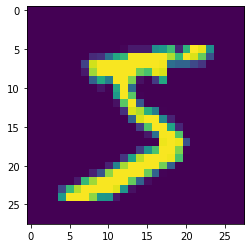

In [14]:
plt.imshow(X_train[0])

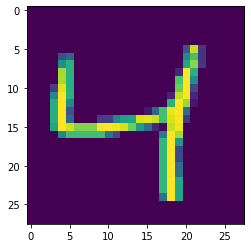

In [16]:
plt.imshow(X_train[2])

In [21]:
#Creating ANN

ann = models.Sequential([
                layers.Flatten(input_shape = (28, 28)),
                layers.Dense(3000, activation = 'relu'),
                layers.Dense(1000, activation = 'relu'),
                layers.Dense(10, activation = 'softmax')
])

ann.compile(optimizer = 'SGD', 
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

ann.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 68s 36ms/step - loss: nan - accuracy: 0.0987
Epoch 2/5
1875/1875 [==============================] - 67s 36ms/step - loss: nan - accuracy: 0.0987
Epoch 3/5
1875/1875 [==============================] - 67s 36ms/step - loss: nan - accuracy: 0.0987
Epoch 4/5
1875/1875 [==============================] - 67s 36ms/step - loss: nan - accuracy: 0.0987
Epoch 5/5
1875/1875 [==============================] - 68s 36ms/step - loss: nan - accuracy: 0.0987


In [23]:
#Performances: Confusion matrix and classification report ( Recall, F1, Precision and Accuracy)
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print('Classification Report: \n', classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.10      1.00      0.18       980
           1       0.00      0.00      0.00      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [26]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

In [28]:
#Build an CNN

cnn = models.Sequential([
      layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
      layers.MaxPooling2D((2, 2)),

      layers.Flatten(),
      layers.Dense(100, activation='relu'),
      layers.Dense(10, activation= 'softmax')
])

In [ ]:
cnn.compile( optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.5269 - accuracy: 0.9243
Epoch 2/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0858 - accuracy: 0.9757
Epoch 3/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0595 - accuracy: 0.9823
Epoch 4/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0501 - accuracy: 0.9847
Epoch 5/5
1143/1875 [=================>............] - ETA: 13s - loss: 0.0367 - accuracy: 0.9880

In [32]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0900 - accuracy: 0.9766


[0.08999934792518616, 0.9765999913215637]